In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, models, layers

import matplotlib.pyplot as plt

def reshaper(X):
    X = X.reshape(list(X.shape) + [1])
    return X

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0


model = models.Sequential([
    layers.Conv2D(14, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1), kernel_initializer="he_normal"),
    layers.MaxPooling2D(),
    layers.Conv2D(28, (3, 3), padding="same", activation='relu',  kernel_initializer="he_normal"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
    layers.Dense(10, activation='softmax', kernel_initializer="he_normal"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 28)        3556      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1372)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                87872     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4479 - accuracy: 0.8405 - val_loss: 0.3564 - val_accuracy: 0.8746
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3020 - accuracy: 0.8908 - val_loss: 0.2965 - val_accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2611 - accuracy: 0.9049 - val_loss: 0.2854 - val_accuracy: 0.8973
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2349 - accuracy: 0.9139 - val_loss: 0.2644 - val_accuracy: 0.9052
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2133 - accuracy: 0.9214 - val_loss: 0.2487 - val_accuracy: 0.9097
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1938 - accuracy: 0.9279 - val_loss: 0.2569 - val_accuracy: 0.9048
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1784 - accuracy: 0.9331 - val_loss: 0.2454 -

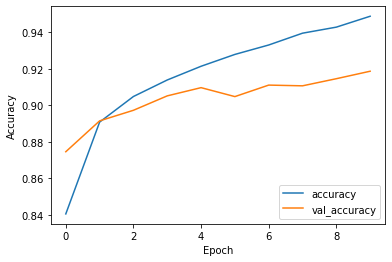

In [2]:

train_images = reshaper(train_images)
test_images = reshaper(test_images)
test_labels = reshaper(test_labels)
train_labels = reshaper(train_labels)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
CM = [[0 for _ in range(10)] for _ in range(10)]
ims = [[(None, None) for _ in range(10)] for _ in range(10)]
pred_prob = model.predict(test_images)
pred = model.predict_classes(test_images)
for i in range(10000):
    CM[test_labels[i][0]][pred[i]] += 1

    (cur, _) = ims[test_labels[i][0]][pred[i]]
    if cur is None or cur < pred_prob[i][pred[i]]:
        ims[test_labels[i][0]][pred[i]] = (pred_prob[i][pred[i]], i)
for string in CM:
    print(string)

In [ ]:
plt.figure(figsize=(20,20))

for i in range(10):
    for j in range(10):
        plt.subplot(10,10, 10 * i + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        (_, k) = ims[i][j]
        if not k is None:
            plt.imshow(test_images[k], cmap=plt.cm.binary)
            plt.xlabel("Real {}, Pred {}".format(i, j))